In [194]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 

all_data = pd.read_csv('all_data.csv')
all_data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [153]:
test = all_data.groupby('Country')

for name, group in test: 
    print(name)
    print(group)
    print('')

Chile
   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014   

In [98]:
average_gdp = all_data.groupby('Country')['GDP'].mean().reset_index()
average_age = all_data.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()

countries = list(average_age['Country'])
countries_list = [item.replace('United States of America', 'USA') for item in countries]

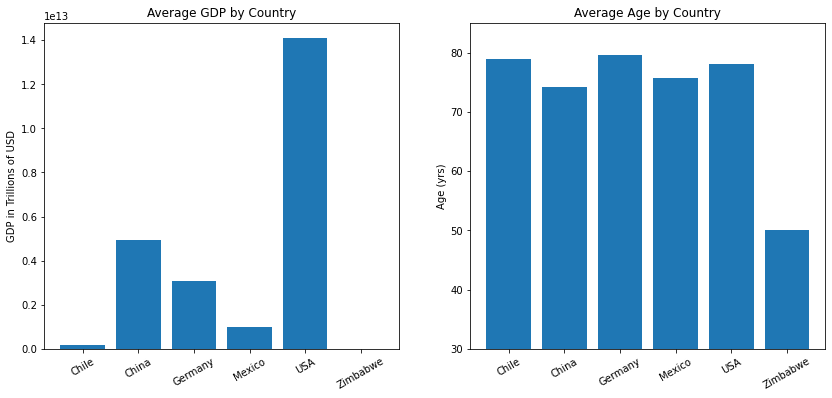

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(average_gdp['Country'], average_gdp['GDP'])
ax[0].tick_params(axis='x', rotation=30);
ax[0].set_xticks(average_gdp['Country']);
ax[0].set_xticklabels(countries_list);
ax[0].set_ylabel('GDP in Trillions of USD')

ax[0].set_title('Average GDP by Country');

ax[1].bar(average_age['Country'], average_age['Life expectancy at birth (years)']);
ax[1].tick_params(axis='x', rotation=30);
ax[1].set_xticks(average_gdp['Country']);
ax[1].set_xticklabels(countries_list);
ax[1].set_ylabel('Age (yrs)');
ax[1].set_ylim(30, 85);
ax[1].set_title('Average Age by Country');

In [204]:
list_years = list(all_data['Year'].unique())
years = []

for year in list_years:
    if year % 2 == 0:
        years.append(str(year))
    else:
        years.append('')
        
colors = np.array([['gray', 'red', 'black'], 
                 ['tab:green', 'tab:blue', 'tab:orange']])

In [241]:
for name, group in test:
    max_age = group['Life expectancy at birth (years)'].max()
    min_age = group['Life expectancy at birth (years)'].min()
    avg_age = group['Life expectancy at birth (years)'].mean()
    
    print(f"{name}: \nmax: {max_age} \nmin: {min_age} \nmax age - min age: {max_age-min_age:,.1f} \navg: {avg_age:,.1f}")
    delta_age = abs(group.iloc[0,2] - group.iloc[-1,2]) 
    print(f"(2015 - 2010) age: {delta_age:,.1f}")
    print('')

Chile: 
max: 80.5 
min: 77.3 
max age - min age: 3.2 
avg: 78.9
(2015 - 2010) age: 3.2

China: 
max: 76.1 
min: 71.7 
max age - min age: 4.4 
avg: 74.3
(2015 - 2010) age: 4.4

Germany: 
max: 81.0 
min: 78.0 
max age - min age: 3.0 
avg: 79.7
(2015 - 2010) age: 3.0

Mexico: 
max: 76.7 
min: 74.8 
max age - min age: 1.9 
avg: 75.7
(2015 - 2010) age: 1.9

United States of America: 
max: 79.3 
min: 76.8 
max age - min age: 2.5 
avg: 78.1
(2015 - 2010) age: 2.5

Zimbabwe: 
max: 60.7 
min: 44.3 
max age - min age: 16.4 
avg: 50.1
(2015 - 2010) age: 14.7



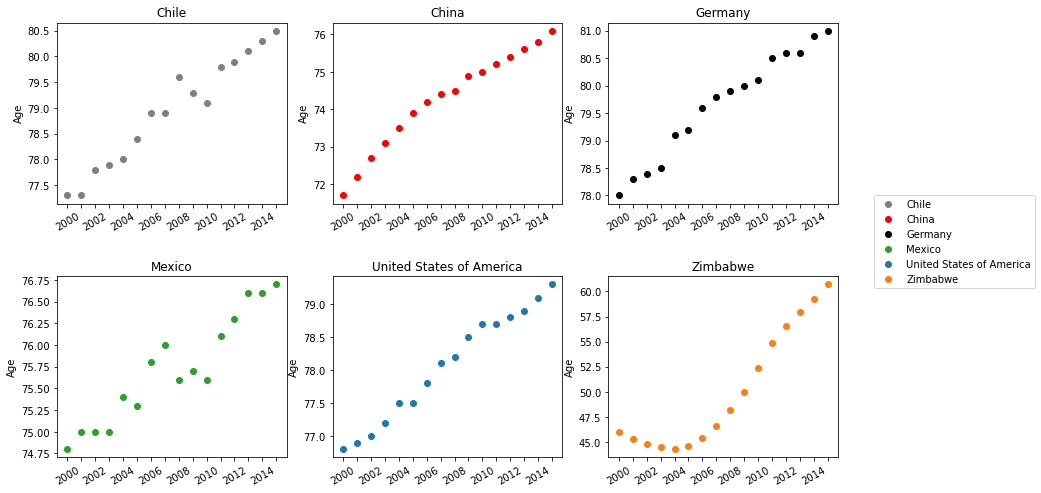

In [211]:
test = all_data.groupby('Country')

fig, ax = plt.subplots(2, 3, figsize=(14,8))    

i = 0
j = 0

for name, group in test:
    c = colors[i,j]
    ax[i,j].scatter(group['Year'], group['Life expectancy at birth (years)'], color=c, label=f'{name}')
    ax[i,j].set_ylabel('Age')
    ax[i,j].set_title(f'{name}')
    ax[i,j].set_xticks(group.Year.unique())
    ax[i,j].set_xticklabels(years)
    ax[i,j].tick_params(axis='x', rotation=30)
    j += 1
    if j > 2:
        j = 0
        i += 1
        
plt.subplots_adjust(wspace=0.2, hspace=0.4);
fig.legend(loc='center right', bbox_to_anchor=(1.1, 0.5));

In [422]:
list_gdp = list(chile_data['GDP'])

def format_axes(input_list):
    list_gdp = input_list
    
    formatted_list = []
    
    for item in list_gdp: 
        if (item >= 10**9):
            formatted_list.append(f"${item / 10 ** 9:,.0f} B")
            
        elif (item >= 10**6):
            formatted_list.append(f"${item / 10 ** 6:,.0f} B")
        else: 
            item = '$ 0'
            formatted_list.append(item)
    
    return formatted_list

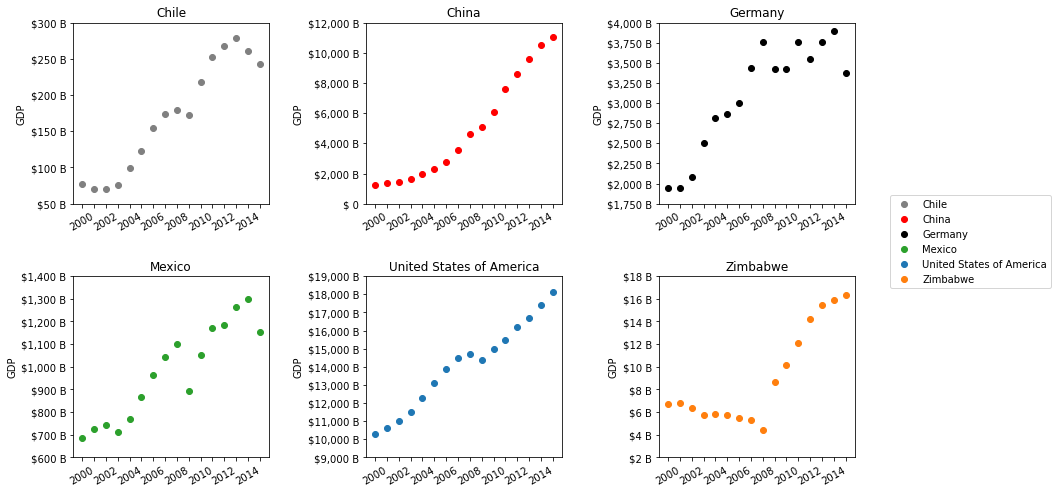

In [424]:
test = all_data.groupby('Country')

fig, ax = plt.subplots(2, 3, figsize=(14,8))    

i = 0
j = 0

for name, group in test:
    c = colors[i,j]
    ax[i,j].scatter(group['Year'], group['GDP'], color=c, label=f'{name}')
    ax[i,j].set_ylabel('GDP')
    ax[i,j].set_title(f'{name}')
    ax[i,j].set_xticks(group.Year.unique())
    ax[i,j].set_xticklabels(years)
    
    lst = list(ax[i,j].get_yticks())
    formatted_list = format_axes(lst)
    
    ax[i,j].set_yticks(lst)
    ax[i,j].set_yticklabels(formatted_list)
    
    ax[i,j].tick_params(axis='x', rotation=30)
    
    j += 1
    if j > 2:
        j = 0
        i += 1
        
plt.subplots_adjust(wspace=0.5, hspace=0.4);
fig.legend(loc='center right', bbox_to_anchor=(1.1, 0.5));

Life Expectancy has increased over the six nations between the years of 2000-2015. \